# Reducing Dimensionality for Visualization
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Stef0916/chemoinformatics-bioinformatics/blob/main/prediction-fluorination-strength/notebooks/pca-tsne-2.ipynb)


If we want to visualize (plot) the chemical space it would not be possible because of to the high dimensionality of fingerprints. To do so, we need to apply dimensionallity reduction methods such as:

  - [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) - Principal component analysis
  - [t-SNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) - t-Distributed Stochastic Neighbor Embedding



In [49]:
!pip install rdkit-pypi

In [50]:
!pip install openpyxl

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

## Load Data

In [52]:
df1 = pd.read_excel('reduced_descriptors.xlsx')

In [53]:
df1.head()

,nSpiro,ATSC1c,ATSC3c,ATSC4c,ATSC5c,ATSC6c,ATSC8c,ATSC4dv,ATSC3d,ATSC4d,...,AMID_N,JGI2,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10
0,0,-0.165111,-0.059759,0.120854,0.066913,-0.013867,-0.050482,50.150617,-6.640000,-2.511111,...,0.104059,0.121864,0.073529,0.041864,0.035791,0.018367,0.008433,0.004031,0.005625,0.000000
1,0,-0.165111,-0.059759,0.120854,0.066913,-0.013867,-0.050482,50.150617,-6.640000,-2.511111,...,0.104059,0.121864,0.073529,0.041864,0.035791,0.018367,0.008433,0.004031,0.005625,0.000000
2,0,-0.252447,-0.005811,0.031723,-0.110729,0.237455,0.063804,28.227605,-10.269896,-1.041522,...,0.094652,0.124183,0.067434,0.044444,0.041419,0.020408,0.012427,0.010078,0.006944,0.004959
3,0,-0.252447,-0.005811,0.031723,-0.110729,0.237455,0.063804,28.227605,-10.269896,-1.041522,...,0.094652,0.124183,0.067434,0.044444,0.041419,0.020408,0.012427,0.010078,0.006944,0.004959
4,0,-0.164064,-0.069624,0.104539,0.053068,0.042946,-0.003314,77.398429,-7.358127,1.404040,...,0.099120,0.127946,0.071181,0.045972,0.040638,0.017746,0.012804,0.007421,0.010417,0.008264


In [54]:
df1.shape

(260, 88)

In [55]:
df2 = pd.read_excel('F260_raw.xlsx')

In [56]:
df2.head()

,Name of the Reagent,Reagent ID Number,Type of Reagent,Solvent,Smiles,FPD
0,N-fluoro-N-(phenylsulfonyl)benzenesulfonamide,A1a,N-Fluorosulfonimides,MeCN,O=S(C1=CC=CC=C1)(N(S(C2=CC=C([H])C=C2)(=O)=O)F)=O,229.6
1,N-fluoro-N-(phenylsulfonyl)benzenesulfonamide,A1a,N-Fluorosulfonimides,DCM,O=S(C1=CC=CC=C1)(N(S(C2=CC=C([H])C=C2)(=O)=O)F)=O,242.4
2,N-fluoro-4-methoxy-N-(phenylsulfonyl)benzenesu...,A1b,N-Fluorosulfonimides,MeCN,O=S(C1=CC=CC=C1)(N(S(C2=CC=C(OC)C=C2)(=O)=O)F)=O,231.2
3,N-fluoro-4-methoxy-N-(phenylsulfonyl)benzenesu...,A1b,N-Fluorosulfonimides,DCM,O=S(C1=CC=CC=C1)(N(S(C2=CC=C(OC)C=C2)(=O)=O)F)=O,244.2
4,N-fluoro-4-methyl-N-(phenylsulfonyl)benzenesul...,A1c,N-Fluorosulfonimides,MeCN,O=S(C1=CC=CC=C1)(N(S(C2=CC=C(C)C=C2)(=O)=O)F)=O,230.3


In [57]:
df2.shape

(260, 6)

## Data Scaling

In [58]:
# Initialize the scaler
scaler = StandardScaler()

In [59]:
# Scale the features and store it in a DataFrame
scaled_features = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)

In [60]:
scaled_features

,nSpiro,ATSC1c,ATSC3c,ATSC4c,ATSC5c,ATSC6c,ATSC8c,ATSC4dv,ATSC3d,ATSC4d,...,AMID_N,JGI2,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10
0,-0.2,-0.015125,-0.389875,0.602119,0.478125,-0.220872,-0.324826,1.013492,0.101544,-0.033810,...,-0.698253,0.042388,0.167519,-0.461855,0.207127,0.451983,0.159741,-0.059835,0.418275,-0.524982
1,-0.2,-0.015125,-0.389875,0.602119,0.478125,-0.220872,-0.324826,1.013492,0.101544,-0.033810,...,-0.698253,0.042388,0.167519,-0.461855,0.207127,0.451983,0.159741,-0.059835,0.418275,-0.524982
2,-0.2,-0.528300,-0.096461,0.226107,-0.087012,0.653969,0.452898,0.615080,-0.293159,0.140281,...,-0.761560,0.106082,-0.055299,-0.402867,0.447230,0.589695,0.594686,0.776591,0.640053,0.831716
3,-0.2,-0.528300,-0.096461,0.226107,-0.087012,0.653969,0.452898,0.615080,-0.293159,0.140281,...,-0.761560,0.106082,-0.055299,-0.402867,0.447230,0.589695,0.594686,0.776591,0.640053,0.831716
4,-0.2,-0.008975,-0.443534,0.533294,0.434078,-0.023109,-0.003841,1.508673,0.023457,0.429988,...,-0.731495,0.209431,0.081654,-0.367945,0.413920,0.410070,0.635729,0.409070,1.223680,1.736181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,-0.2,-1.138742,0.661813,-0.756530,0.543756,0.156477,0.029037,0.640892,0.222175,-0.195077,...,-0.339542,-0.916295,-0.875409,-0.288576,-0.053388,0.428678,1.239996,1.085444,0.657562,2.374252
256,-0.2,0.863414,-0.064853,0.092277,0.265252,-0.172602,0.018709,0.102093,0.823555,0.263662,...,6.027780,-3.304443,-2.520441,-1.418784,-1.319765,-0.787431,-0.758475,-0.617453,-0.527199,-0.524982
257,-0.2,0.863414,-0.064853,0.092277,0.265252,-0.172602,0.018709,0.102093,0.823555,0.263662,...,6.027780,-3.304443,-2.520441,-1.418784,-1.319765,-0.787431,-0.758475,-0.617453,-0.527199,-0.524982
258,-0.2,0.617198,-0.064853,0.092277,0.265252,-0.172602,0.018709,0.102093,0.823555,0.263662,...,1.293261,-3.304443,-2.520441,-1.418784,-1.319765,-0.787431,-0.758475,-0.617453,-0.527199,-0.524982


In [61]:
# Scale the FPD column separately
fpd_scaler = StandardScaler()
scaled_FPD = pd.DataFrame(fpd_scaler.fit_transform(df2[['FPD']]), columns=['FPD'])

In [62]:
scaled_FPD

,FPD
0,-0.209117
1,0.322217
2,-0.142700
3,0.396936
4,-0.180060
...,...
255,0.666755
256,-5.136417
257,-5.078302
258,-3.475996


In [63]:
# Add the scaled FPD column to the scaled_features DataFrame
scaled_features['FPD_scaled'] = scaled_FPD

scaled_features.head()

,nSpiro,ATSC1c,ATSC3c,ATSC4c,ATSC5c,ATSC6c,ATSC8c,ATSC4dv,ATSC3d,ATSC4d,...,JGI2,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,FPD_scaled
0,-0.2,-0.015125,-0.389875,0.602119,0.478125,-0.220872,-0.324826,1.013492,0.101544,-0.033810,...,0.042388,0.167519,-0.461855,0.207127,0.451983,0.159741,-0.059835,0.418275,-0.524982,-0.209117
1,-0.2,-0.015125,-0.389875,0.602119,0.478125,-0.220872,-0.324826,1.013492,0.101544,-0.033810,...,0.042388,0.167519,-0.461855,0.207127,0.451983,0.159741,-0.059835,0.418275,-0.524982,0.322217
2,-0.2,-0.528300,-0.096461,0.226107,-0.087012,0.653969,0.452898,0.615080,-0.293159,0.140281,...,0.106082,-0.055299,-0.402867,0.447230,0.589695,0.594686,0.776591,0.640053,0.831716,-0.142700
3,-0.2,-0.528300,-0.096461,0.226107,-0.087012,0.653969,0.452898,0.615080,-0.293159,0.140281,...,0.106082,-0.055299,-0.402867,0.447230,0.589695,0.594686,0.776591,0.640053,0.831716,0.396936
4,-0.2,-0.008975,-0.443534,0.533294,0.434078,-0.023109,-0.003841,1.508673,0.023457,0.429988,...,0.209431,0.081654,-0.367945,0.413920,0.410070,0.635729,0.409070,1.223680,1.736181,-0.180060


In [64]:
scaled_data = pd.concat([df2[' Type of Reagent'], df2['Solvent'], scaled_features], axis=1)

In [65]:
scaled_data.head()

,Type of Reagent,Solvent,nSpiro,ATSC1c,ATSC3c,ATSC4c,ATSC5c,ATSC6c,ATSC8c,ATSC4dv,...,JGI2,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,FPD_scaled
0,N-Fluorosulfonimides,MeCN,-0.2,-0.015125,-0.389875,0.602119,0.478125,-0.220872,-0.324826,1.013492,...,0.042388,0.167519,-0.461855,0.207127,0.451983,0.159741,-0.059835,0.418275,-0.524982,-0.209117
1,N-Fluorosulfonimides,DCM,-0.2,-0.015125,-0.389875,0.602119,0.478125,-0.220872,-0.324826,1.013492,...,0.042388,0.167519,-0.461855,0.207127,0.451983,0.159741,-0.059835,0.418275,-0.524982,0.322217
2,N-Fluorosulfonimides,MeCN,-0.2,-0.528300,-0.096461,0.226107,-0.087012,0.653969,0.452898,0.615080,...,0.106082,-0.055299,-0.402867,0.447230,0.589695,0.594686,0.776591,0.640053,0.831716,-0.142700
3,N-Fluorosulfonimides,DCM,-0.2,-0.528300,-0.096461,0.226107,-0.087012,0.653969,0.452898,0.615080,...,0.106082,-0.055299,-0.402867,0.447230,0.589695,0.594686,0.776591,0.640053,0.831716,0.396936
4,N-Fluorosulfonimides,MeCN,-0.2,-0.008975,-0.443534,0.533294,0.434078,-0.023109,-0.003841,1.508673,...,0.209431,0.081654,-0.367945,0.413920,0.410070,0.635729,0.409070,1.223680,1.736181,-0.180060


In [66]:
# Saving the scaled data to an Excel file
scaled_data.to_excel('scaled_data_tsne_pca.xlsx', index=False)

## One-hot encoding

In [67]:
encoded_data = pd.get_dummies(scaled_data, columns=[" Type of Reagent", "Solvent"])
encoded_data.head()

,nSpiro,ATSC1c,ATSC3c,ATSC4c,ATSC5c,ATSC6c,ATSC8c,ATSC4dv,ATSC3d,ATSC4d,...,JGI10,FPD_scaled,Type of Reagent_N-Fluoroammoniums,Type of Reagent_N-Fluorocarboxamides,Type of Reagent_N-Fluoroheterocycles,Type of Reagent_N-Fluoropyridiniums,Type of Reagent_N-Fluorosulfonamides,Type of Reagent_N-Fluorosulfonimides,Solvent_DCM,Solvent_MeCN
0,-0.2,-0.015125,-0.389875,0.602119,0.478125,-0.220872,-0.324826,1.013492,0.101544,-0.033810,...,-0.524982,-0.209117,0,0,0,0,0,1,0,1
1,-0.2,-0.015125,-0.389875,0.602119,0.478125,-0.220872,-0.324826,1.013492,0.101544,-0.033810,...,-0.524982,0.322217,0,0,0,0,0,1,1,0
2,-0.2,-0.528300,-0.096461,0.226107,-0.087012,0.653969,0.452898,0.615080,-0.293159,0.140281,...,0.831716,-0.142700,0,0,0,0,0,1,0,1
3,-0.2,-0.528300,-0.096461,0.226107,-0.087012,0.653969,0.452898,0.615080,-0.293159,0.140281,...,0.831716,0.396936,0,0,0,0,0,1,1,0
4,-0.2,-0.008975,-0.443534,0.533294,0.434078,-0.023109,-0.003841,1.508673,0.023457,0.429988,...,1.736181,-0.180060,0,0,0,0,0,1,0,1


In [68]:
encoded_data.to_excel('encoded_data_tsne_pca.xlsx', index=False)

### t-SNE

In [69]:
encoded_data.head()

,nSpiro,ATSC1c,ATSC3c,ATSC4c,ATSC5c,ATSC6c,ATSC8c,ATSC4dv,ATSC3d,ATSC4d,...,JGI10,FPD_scaled,Type of Reagent_N-Fluoroammoniums,Type of Reagent_N-Fluorocarboxamides,Type of Reagent_N-Fluoroheterocycles,Type of Reagent_N-Fluoropyridiniums,Type of Reagent_N-Fluorosulfonamides,Type of Reagent_N-Fluorosulfonimides,Solvent_DCM,Solvent_MeCN
0,-0.2,-0.015125,-0.389875,0.602119,0.478125,-0.220872,-0.324826,1.013492,0.101544,-0.033810,...,-0.524982,-0.209117,0,0,0,0,0,1,0,1
1,-0.2,-0.015125,-0.389875,0.602119,0.478125,-0.220872,-0.324826,1.013492,0.101544,-0.033810,...,-0.524982,0.322217,0,0,0,0,0,1,1,0
2,-0.2,-0.528300,-0.096461,0.226107,-0.087012,0.653969,0.452898,0.615080,-0.293159,0.140281,...,0.831716,-0.142700,0,0,0,0,0,1,0,1
3,-0.2,-0.528300,-0.096461,0.226107,-0.087012,0.653969,0.452898,0.615080,-0.293159,0.140281,...,0.831716,0.396936,0,0,0,0,0,1,1,0
4,-0.2,-0.008975,-0.443534,0.533294,0.434078,-0.023109,-0.003841,1.508673,0.023457,0.429988,...,1.736181,-0.180060,0,0,0,0,0,1,0,1


In [70]:
# Drop the one-hot encoded columns "Type of Reagent" and "Solvent"
features_for_tsne = encoded_data.drop(columns=encoded_data.filter(regex='Type of Reagent|Solvent').columns)
features_for_tsne.head()

,nSpiro,ATSC1c,ATSC3c,ATSC4c,ATSC5c,ATSC6c,ATSC8c,ATSC4dv,ATSC3d,ATSC4d,...,JGI2,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,FPD_scaled
0,-0.2,-0.015125,-0.389875,0.602119,0.478125,-0.220872,-0.324826,1.013492,0.101544,-0.033810,...,0.042388,0.167519,-0.461855,0.207127,0.451983,0.159741,-0.059835,0.418275,-0.524982,-0.209117
1,-0.2,-0.015125,-0.389875,0.602119,0.478125,-0.220872,-0.324826,1.013492,0.101544,-0.033810,...,0.042388,0.167519,-0.461855,0.207127,0.451983,0.159741,-0.059835,0.418275,-0.524982,0.322217
2,-0.2,-0.528300,-0.096461,0.226107,-0.087012,0.653969,0.452898,0.615080,-0.293159,0.140281,...,0.106082,-0.055299,-0.402867,0.447230,0.589695,0.594686,0.776591,0.640053,0.831716,-0.142700
3,-0.2,-0.528300,-0.096461,0.226107,-0.087012,0.653969,0.452898,0.615080,-0.293159,0.140281,...,0.106082,-0.055299,-0.402867,0.447230,0.589695,0.594686,0.776591,0.640053,0.831716,0.396936
4,-0.2,-0.008975,-0.443534,0.533294,0.434078,-0.023109,-0.003841,1.508673,0.023457,0.429988,...,0.209431,0.081654,-0.367945,0.413920,0.410070,0.635729,0.409070,1.223680,1.736181,-0.180060


In [71]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(features_for_tsne)

In [72]:
# Convert the t-SNE results to a DataFrame
tsne_df = pd.DataFrame(data=tsne_results, columns=['t-SNE 1', 't-SNE 2'])

In [73]:
tsne_df

,t-SNE 1,t-SNE 2
0,-3.485435,-7.396472
1,-4.036966,-7.819858
2,0.682690,-9.563416
3,0.605419,-10.030413
4,-2.024494,-10.239299
...,...,...
255,2.098275,-22.594824
256,15.789453,10.787373
257,15.789447,10.787345
258,17.154980,8.329402


In [74]:
# Add the original "Type of Reagent" column
tsne_df['Type of Reagent'] = scaled_data[' Type of Reagent']
tsne_df

,t-SNE 1,t-SNE 2,Type of Reagent
0,-3.485435,-7.396472,N-Fluorosulfonimides
1,-4.036966,-7.819858,N-Fluorosulfonimides
2,0.682690,-9.563416,N-Fluorosulfonimides
3,0.605419,-10.030413,N-Fluorosulfonimides
4,-2.024494,-10.239299,N-Fluorosulfonimides
...,...,...,...
255,2.098275,-22.594824,N-Fluoroammoniums
256,15.789453,10.787373,N-Fluoroammoniums
257,15.789447,10.787345,N-Fluoroammoniums
258,17.154980,8.329402,N-Fluoroammoniums


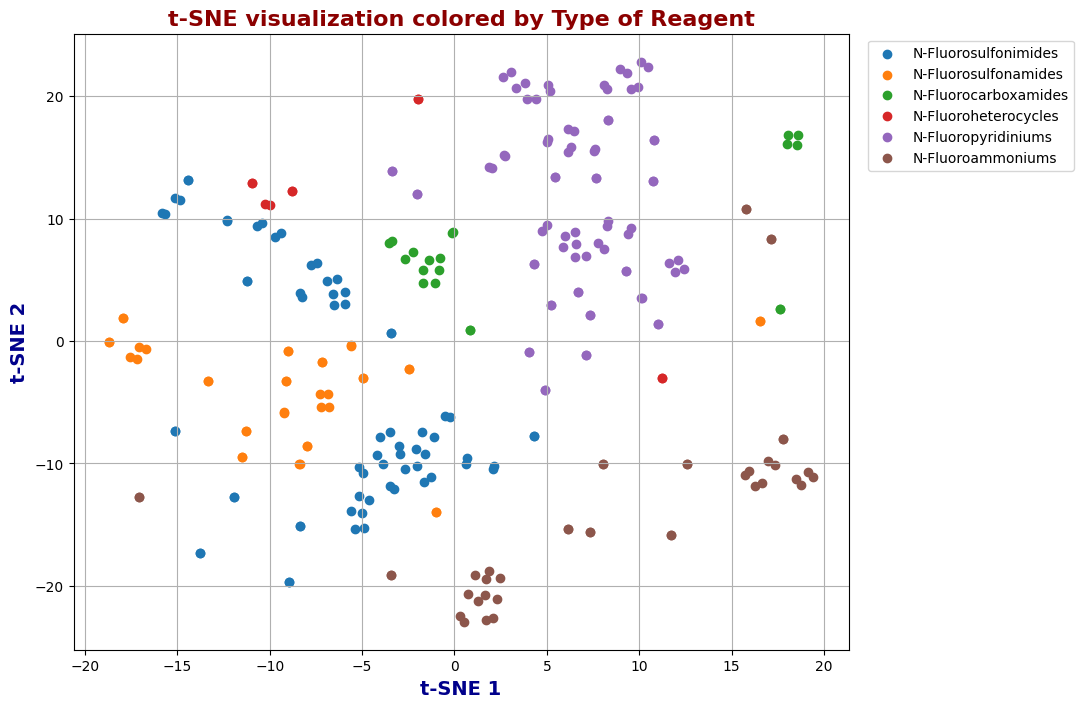

In [75]:
title_font = {"color" : "darkred", "weight" : "bold", "size" : 16}
axis_font = {"color" : "darkblue", "weight" : "bold", "size" : 14}

# Plot the 2 t-SNE dimensions wrt the Type of Reagent
plt.figure(figsize=(10,8))
for reagent in tsne_df['Type of Reagent'].unique():
    subset = tsne_df[tsne_df['Type of Reagent'] == reagent]
    plt.scatter(subset['t-SNE 1'], subset['t-SNE 2'], label=reagent)

plt.title('t-SNE visualization colored by Type of Reagent', fontdict=title_font)
plt.xlabel('t-SNE 1', fontdict=axis_font)
plt.ylabel('t-SNE 2', fontdict=axis_font)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.savefig('tsne-type_reagent.pdf', bbox_inches='tight')
plt.show()

From the visualization above, it is clear that the data is distributed in clusters depending on the six type of reagents.

In [76]:
tsne_df.to_excel('data_tsne_2.xlsx', index=False)

### PCA

In [77]:
# Extracting features
features_for_pca = encoded_data.drop(columns=encoded_data.filter(regex='Type of Reagent|Solvent').columns)
features_for_pca

,nSpiro,ATSC1c,ATSC3c,ATSC4c,ATSC5c,ATSC6c,ATSC8c,ATSC4dv,ATSC3d,ATSC4d,...,JGI2,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,FPD_scaled
0,-0.2,-0.015125,-0.389875,0.602119,0.478125,-0.220872,-0.324826,1.013492,0.101544,-0.033810,...,0.042388,0.167519,-0.461855,0.207127,0.451983,0.159741,-0.059835,0.418275,-0.524982,-0.209117
1,-0.2,-0.015125,-0.389875,0.602119,0.478125,-0.220872,-0.324826,1.013492,0.101544,-0.033810,...,0.042388,0.167519,-0.461855,0.207127,0.451983,0.159741,-0.059835,0.418275,-0.524982,0.322217
2,-0.2,-0.528300,-0.096461,0.226107,-0.087012,0.653969,0.452898,0.615080,-0.293159,0.140281,...,0.106082,-0.055299,-0.402867,0.447230,0.589695,0.594686,0.776591,0.640053,0.831716,-0.142700
3,-0.2,-0.528300,-0.096461,0.226107,-0.087012,0.653969,0.452898,0.615080,-0.293159,0.140281,...,0.106082,-0.055299,-0.402867,0.447230,0.589695,0.594686,0.776591,0.640053,0.831716,0.396936
4,-0.2,-0.008975,-0.443534,0.533294,0.434078,-0.023109,-0.003841,1.508673,0.023457,0.429988,...,0.209431,0.081654,-0.367945,0.413920,0.410070,0.635729,0.409070,1.223680,1.736181,-0.180060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,-0.2,-1.138742,0.661813,-0.756530,0.543756,0.156477,0.029037,0.640892,0.222175,-0.195077,...,-0.916295,-0.875409,-0.288576,-0.053388,0.428678,1.239996,1.085444,0.657562,2.374252,0.666755
256,-0.2,0.863414,-0.064853,0.092277,0.265252,-0.172602,0.018709,0.102093,0.823555,0.263662,...,-3.304443,-2.520441,-1.418784,-1.319765,-0.787431,-0.758475,-0.617453,-0.527199,-0.524982,-5.136417
257,-0.2,0.863414,-0.064853,0.092277,0.265252,-0.172602,0.018709,0.102093,0.823555,0.263662,...,-3.304443,-2.520441,-1.418784,-1.319765,-0.787431,-0.758475,-0.617453,-0.527199,-0.524982,-5.078302
258,-0.2,0.617198,-0.064853,0.092277,0.265252,-0.172602,0.018709,0.102093,0.823555,0.263662,...,-3.304443,-2.520441,-1.418784,-1.319765,-0.787431,-0.758475,-0.617453,-0.527199,-0.524982,-3.475996


In [78]:
# Applying PCA
pca_2 = PCA(n_components=2)
principal_components = pca_2.fit_transform(features_for_pca)

In [79]:
pca_2_df = pd.DataFrame(data=principal_components, columns=['PCA 1', 'PCA 2'])
pca_2_df

,PCA 1,PCA 2
0,1.524244,1.429631
1,1.582590,1.412196
2,3.305122,1.451419
3,3.364381,1.433712
4,3.138358,1.251496
...,...,...
255,5.329237,-2.599473
256,-5.088928,0.799871
257,-5.082547,0.797964
258,-4.481486,4.194218


In [80]:
pca_2_df['Type of Reagent'] = scaled_data[' Type of Reagent']
pca_2_df

,PCA 1,PCA 2,Type of Reagent
0,1.524244,1.429631,N-Fluorosulfonimides
1,1.582590,1.412196,N-Fluorosulfonimides
2,3.305122,1.451419,N-Fluorosulfonimides
3,3.364381,1.433712,N-Fluorosulfonimides
4,3.138358,1.251496,N-Fluorosulfonimides
...,...,...,...
255,5.329237,-2.599473,N-Fluoroammoniums
256,-5.088928,0.799871,N-Fluoroammoniums
257,-5.082547,0.797964,N-Fluoroammoniums
258,-4.481486,4.194218,N-Fluoroammoniums


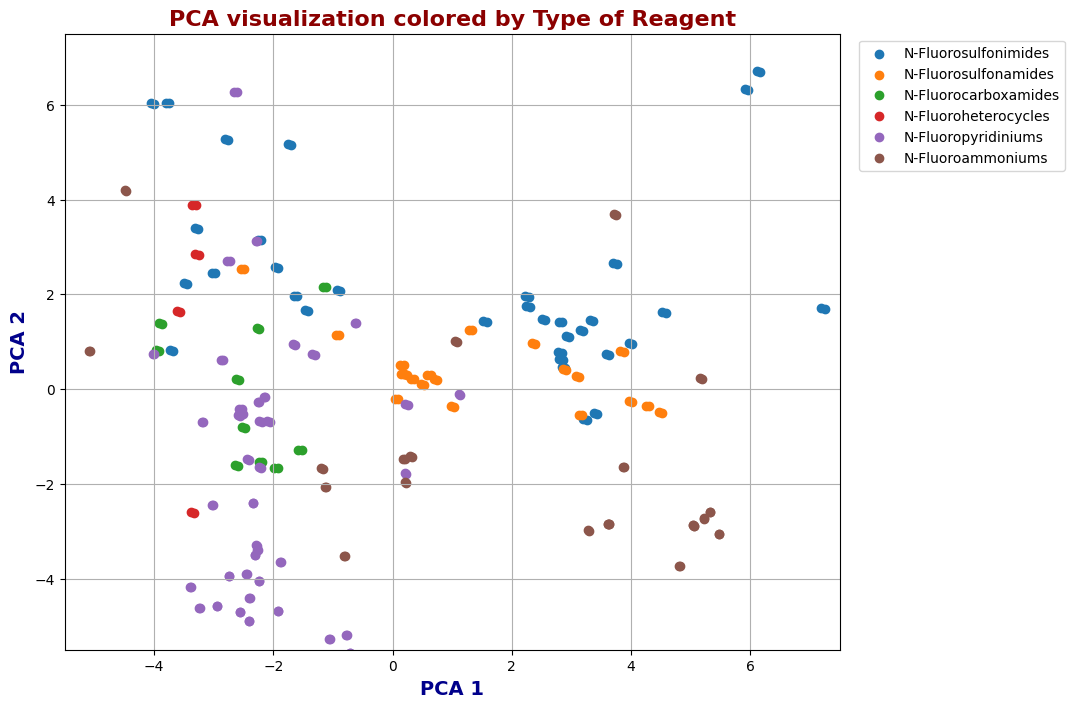

In [81]:
# Plot the 2 PCA dimensions wrt the Type of Reagent
plt.figure(figsize=(10,8))
for reagent in pca_2_df['Type of Reagent'].unique():
    subset = pca_2_df[pca_2_df['Type of Reagent'] == reagent]
    plt.scatter(subset['PCA 1'], subset['PCA 2'], label=reagent)

plt.title('PCA visualization colored by Type of Reagent', fontdict=title_font)
plt.xlabel('PCA 1', fontdict=axis_font)
plt.ylabel('PCA 2', fontdict=axis_font)
plt.xlim(-5.5, 7.5)
plt.ylim(-5.5, 7.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.savefig('pca-type_reagent.pdf', bbox_inches='tight')
plt.show()

In [82]:
pca_2_df.to_excel('data_pca_2.xlsx', index=False)